In [118]:
#Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [119]:
#Importing dataset
data_train=pd.read_csv("C:/Users/DC/Downloads/train_agriculture.csv")
train=pd.DataFrame(data_train)
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [120]:
#Importing dataset
data_test=pd.read_csv("C:/Users/DC/Downloads/test_agriculture.csv")
test=pd.DataFrame(data_test)
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [121]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [122]:
test.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [123]:
train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [124]:
test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

Since ID is not necessary for modelling, it is removed from both train and test sets

In [125]:
test.drop(['ID'],axis=1,inplace=True)
train.drop(['ID'],axis=1,inplace=True)

In [126]:
#Checking null values
train.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [127]:
#Checking null values
test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [128]:
#Imputation
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='mean')
train['Number_Weeks_Used']=si.fit_transform(train['Number_Weeks_Used'].values.reshape(-1,1))

In [129]:
test['Number_Weeks_Used']=si.fit_transform(test['Number_Weeks_Used'].values.reshape(-1,1))

In [130]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [131]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.130647,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,29.033333,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,36.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


There are skewness present in some columns and outliers may also be present in both train and test sets.

It can be seen that by treating outliers, the category 2 of crop damge(y variable) is getting complteley removed. So outlier treatment is avoided.

#Outliers check and treatment 
from scipy.stats import zscore 
threhold=3 
z=np.abs(zscore(train)) 
print(np.where(z>3))

train=train[(z<=3).all(axis=1)] 
train

In [132]:
train['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

EDA

In [133]:
train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


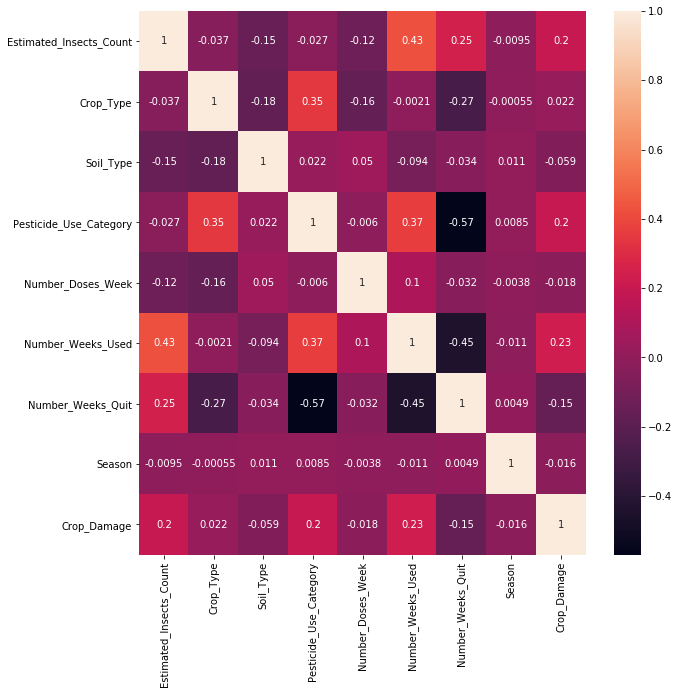

In [134]:
#Correlation 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

NO significant correlation between any variables except Pesticide use category has moderate negetive correlation with numbers weeks quit

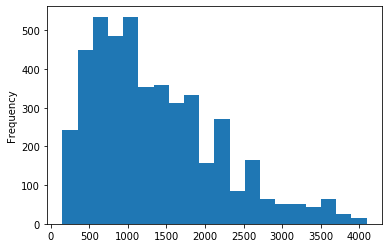

In [135]:
plt.figure()
train['Estimated_Insects_Count'].plot(kind='hist',bins=20)

Estimated insects count=500 has the highest frequency

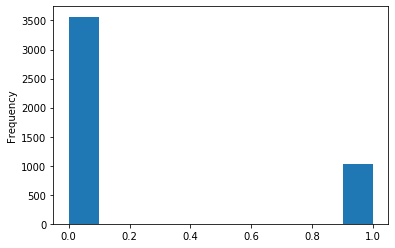

In [136]:
plt.figure()
train['Crop_Type'].plot(kind='hist')

Crop type 0 has the highest frequency

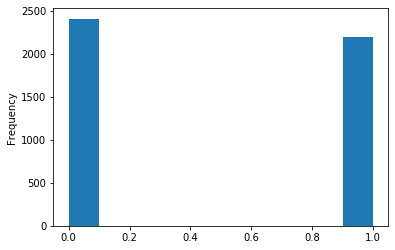

In [137]:
plt.figure()
train['Soil_Type'].plot(kind='hist')

Soil Type 0 has the highest frequency.

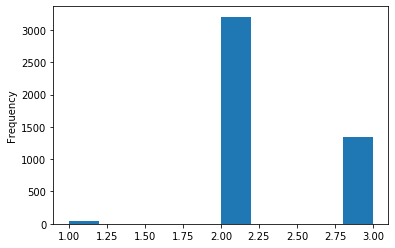

In [138]:
plt.figure()
train['Pesticide_Use_Category'].plot(kind='hist')

Pesticide Use category 2 has the highest frequency and 1 has the lowest.

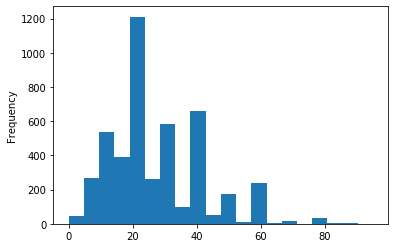

In [139]:
plt.figure()
train['Number_Doses_Week'].plot(kind='hist',bins=20)

Number doses week =20 has the highest frequency and >80 has the lowest.

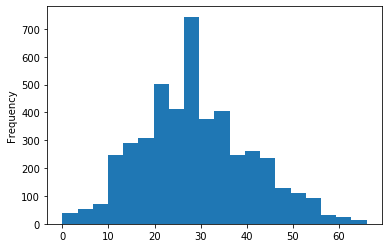

In [140]:
plt.figure()
train['Number_Weeks_Used'].plot(kind='hist',bins=20)

number of weeks used =25 to 30 has the highest frequency.

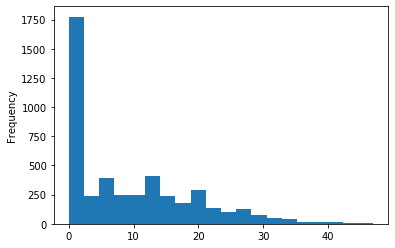

In [141]:
plt.figure()
train['Number_Weeks_Quit'].plot(kind='hist',bins=20)

Number of weeks quit=0 has the highest frequency.

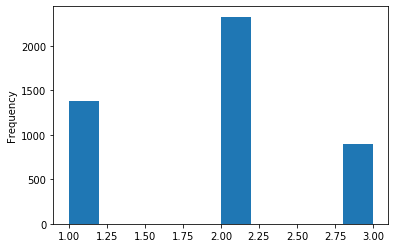

In [142]:
plt.figure()
train['Season'].plot(kind='hist')

Season =2 has the highest frequency and 3 has the lowest.


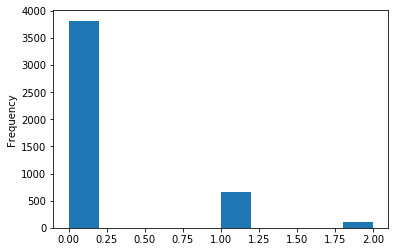

In [143]:
plt.figure()
train['Crop_Damage'].plot(kind='hist')

<Figure size 432x288 with 0 Axes>

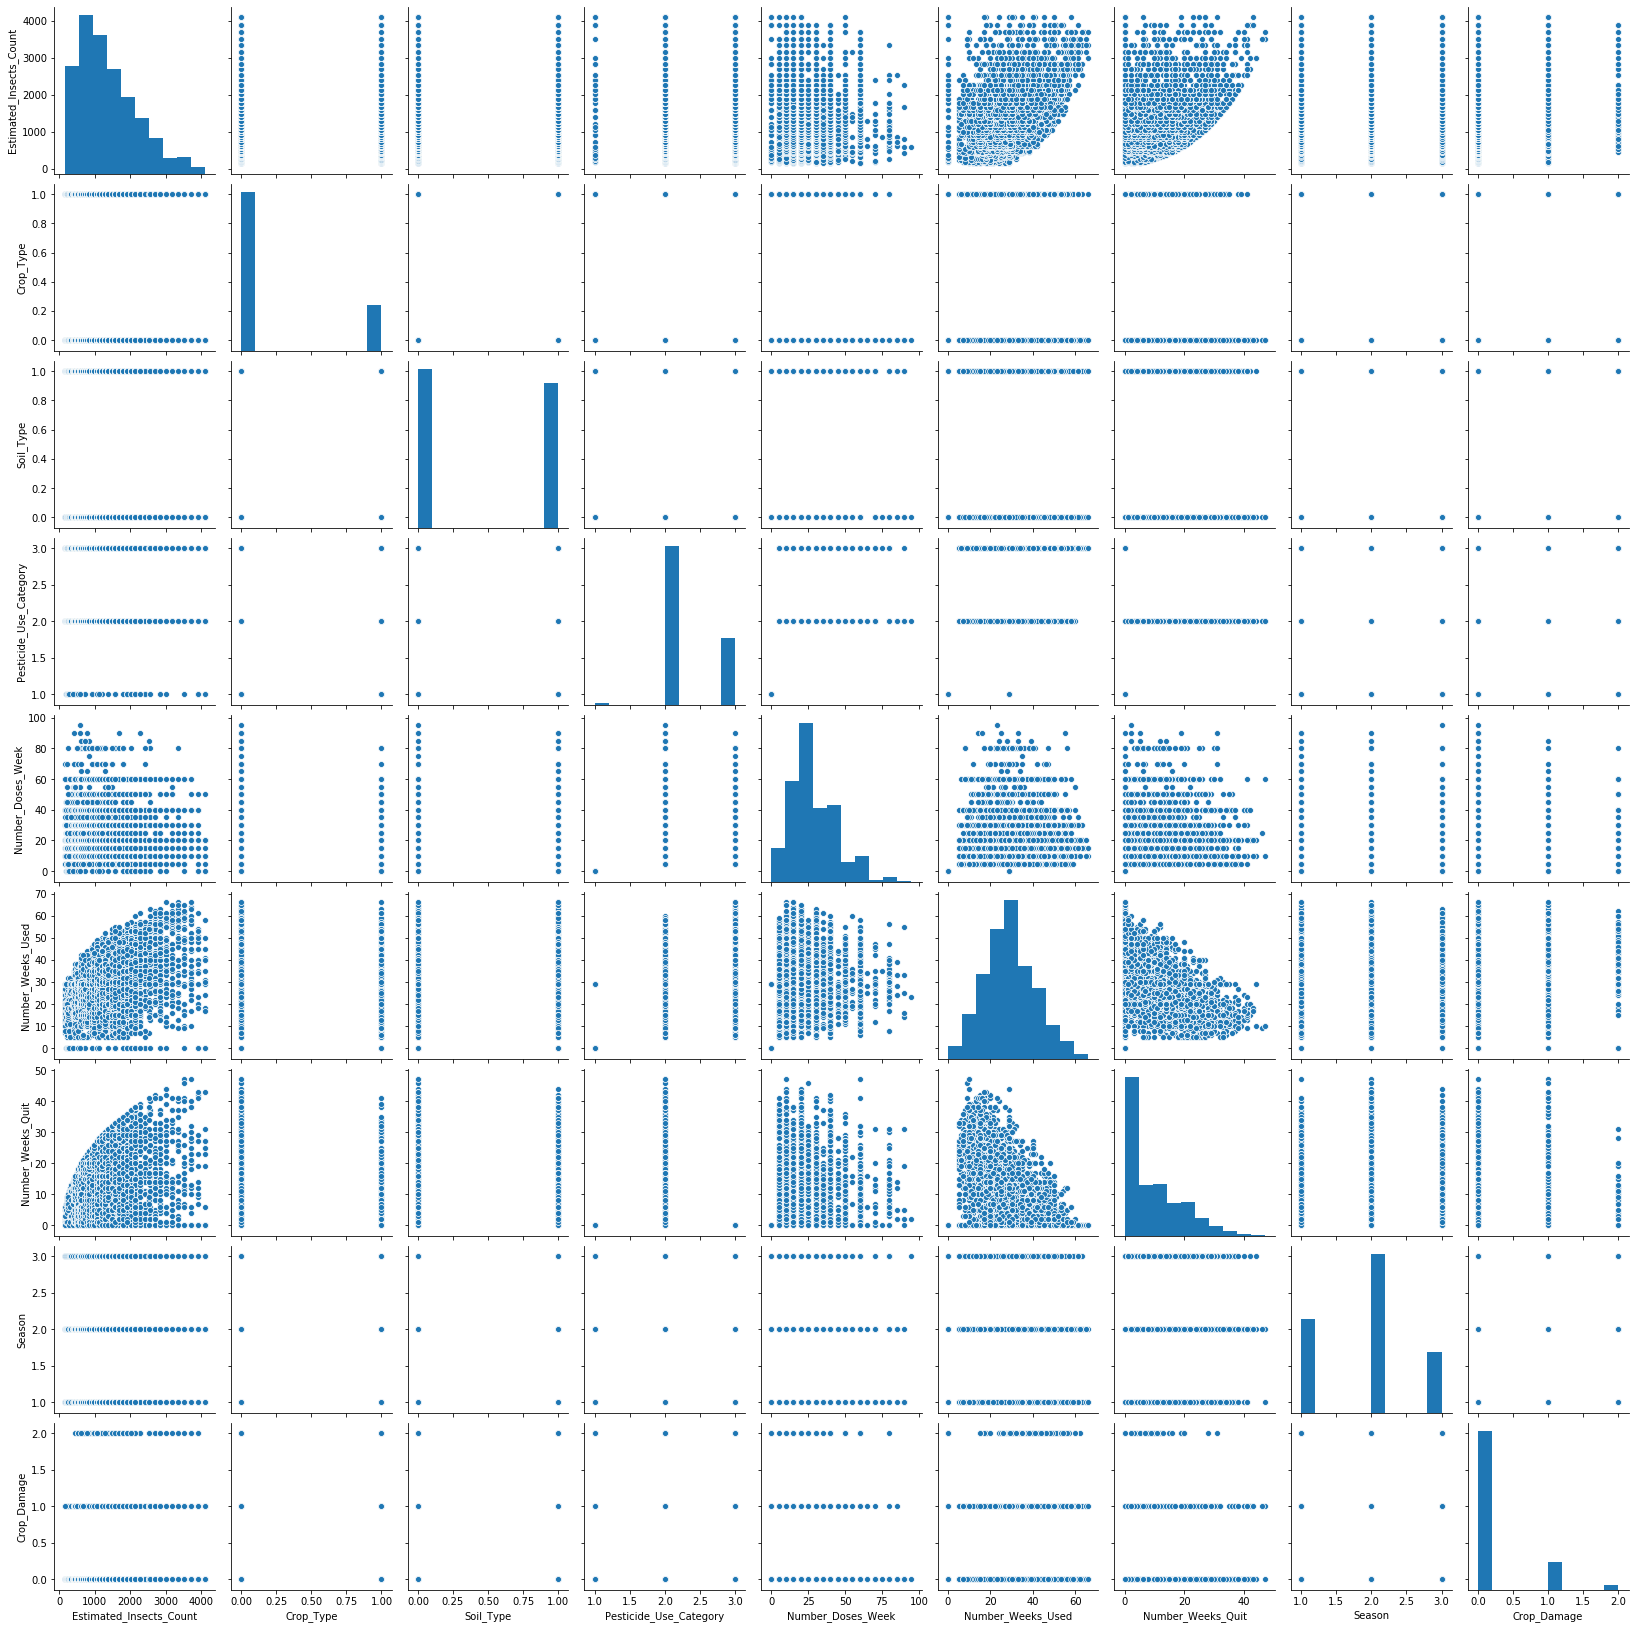

In [144]:
plt.figure()
sns.pairplot(train)

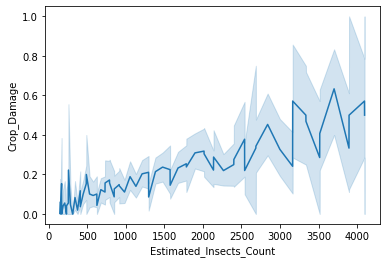

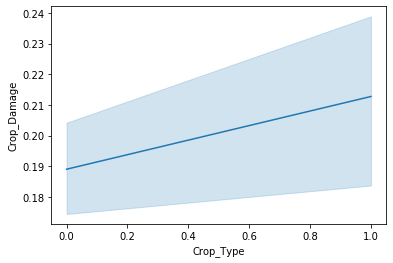

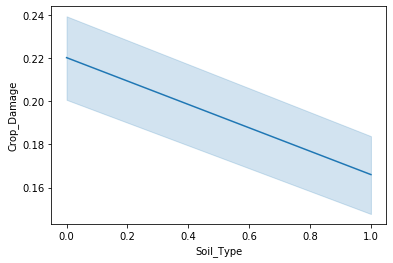

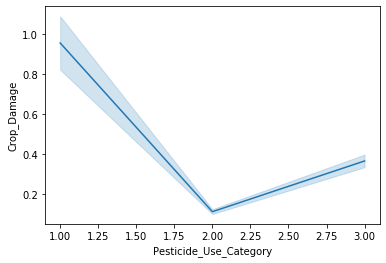

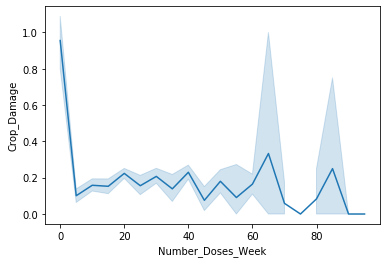

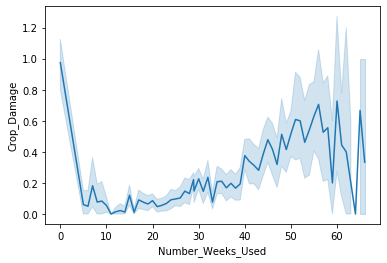

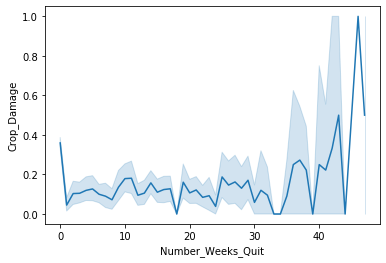

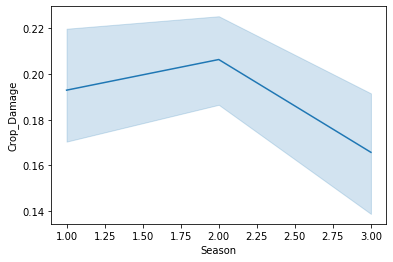

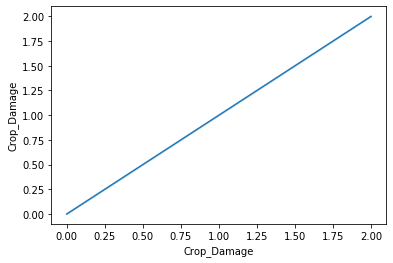

In [145]:
for i in train.columns:
    plt.figure()
    sns.lineplot(i,'Crop_Damage',data=train)

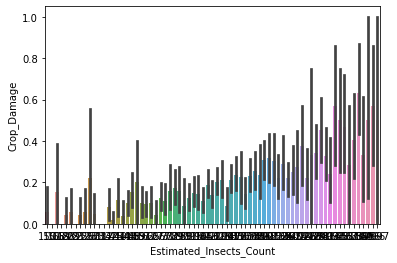

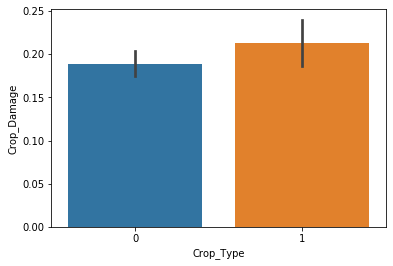

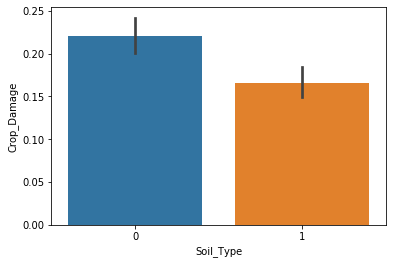

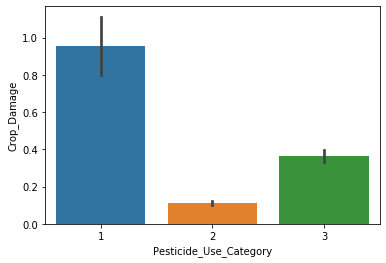

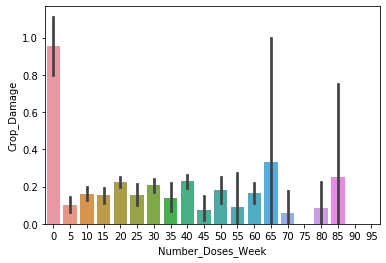

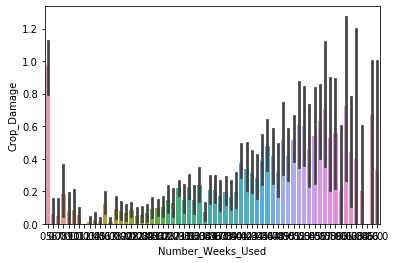

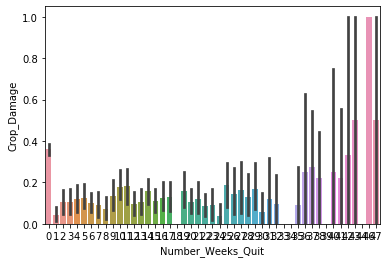

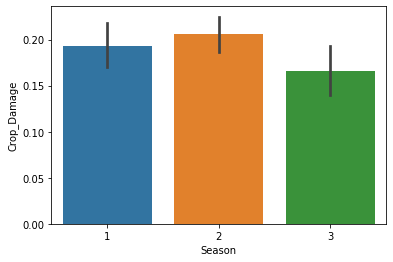

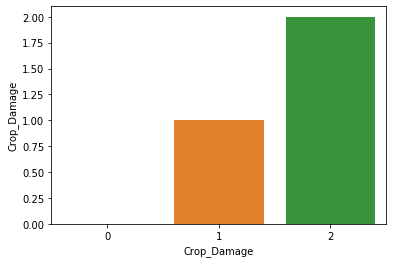

In [146]:
for i in train.columns:
    plt.figure()
    sns.barplot(i,'Crop_Damage',data=train)

Crop damage increases with increase in estimated insect count. Crop type 1 has more crop damage than crop type 0.Soil type 0 has more crop damage than soil type 1. Pestiside use category=1 has the highest crop damage and 2 has the lowest. Crop damage increases as number doses week increases. Crop damage is highest at 65 number doses week, ignoring 0 doses which means no pestiside was used.Crop damage increases as the number weeks used increases, ignoring 0 number which means no pesticide was used.Crop damage increases with increase in number weeks quit. Season 2 has the highest crop damage and 3 has the lowest.

In [147]:
#Skewness treatment
train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

since skewness treatment on the y variable changes the dtype to continuous, we conduct the treatment for the x variables only

In [148]:
dfn=train.drop(['Crop_Damage'],axis=1)
for i in dfn.columns:
    if train.skew().loc[i]>0.55:
        train[i]=train[i].apply(lambda x:np.log(x+1))

In [149]:
train.skew()

Estimated_Insects_Count   -0.498606
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.416624
Number_Doses_Week         -1.196764
Number_Weeks_Used          0.278664
Number_Weeks_Quit         -0.199671
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [150]:
test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [151]:
for i in test.columns:
    if test.skew().loc[i]>0.55:
        test[i]=test[i].apply(lambda x:np.log(x+1))

In [152]:
#X y division of data
x1=train.drop(['Crop_Damage'],axis=1)
y1=train['Crop_Damage']
y1=y1.values.reshape(-1,1)
y1.shape

(4599, 1)

In [153]:
#scaling the data
import sklearn
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dx=scale.fit_transform(x1)
x1=pd.DataFrame(dx,columns=x1.columns)
x1

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-2.697282,1.856819,-0.954294,-3.486849,-4.693318,-2.414732e+00,-1.274392,-1.287027
1,-2.537788,1.856819,-0.954294,-3.486849,-4.693318,-2.414732e+00,-1.274392,0.152078
2,-2.226171,1.856819,-0.954294,-3.486849,-4.693318,-2.414732e+00,-1.274392,0.152078
3,-2.226171,1.856819,1.047895,-3.486849,-4.693318,-2.414732e+00,-1.274392,0.152078
4,-1.795088,1.856819,-0.954294,-3.486849,-4.693318,-2.414732e+00,-1.274392,0.152078
...,...,...,...,...,...,...,...,...
4594,0.975699,-0.538556,1.047895,-0.577098,-0.129396,5.938766e-16,-0.741361,-1.287027
4595,0.976407,-0.538556,1.047895,-0.577098,0.454435,1.513561e+00,-0.429559,-1.287027
4596,1.064347,-0.538556,1.047895,-0.577098,-1.098729,-1.829668e+00,1.288074,0.152078
4597,1.064347,-0.538556,1.047895,-0.577098,-1.098729,-7.431183e-01,1.200925,0.152078


In [154]:
dx1=scale.fit_transform(test)
test=pd.DataFrame(dx1,columns=test.columns)
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-2.491932,2.036154,1.093604,-2.647391,-4.208206,5.859863e-16,-1.010660,0.172804
1,-1.355494,2.036154,1.093604,-2.647391,-4.208206,-2.394386e+00,-1.010660,0.172804
2,-0.737639,2.036154,-0.914407,-2.647391,-4.208206,-2.394386e+00,-1.010660,0.172804
3,-0.511135,2.036154,-0.914407,-2.647391,-4.208206,-2.394386e+00,-1.010660,0.172804
4,-0.399586,-0.491122,-0.914407,-2.647391,-4.208206,-2.394386e+00,-1.010660,-1.286296
...,...,...,...,...,...,...,...,...
1194,0.127918,-0.491122,1.093604,-0.734057,0.823036,4.096022e-01,0.575844,1.631904
1195,0.127918,-0.491122,1.093604,-0.734057,0.823036,-3.326299e-01,0.047009,-1.286296
1196,0.127918,-0.491122,1.093604,-0.734057,-0.083409,-1.322273e+00,1.414028,-1.286296
1197,0.227727,-0.491122,1.093604,-0.734057,-0.959476,4.920724e-01,0.356358,-1.286296


In [155]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [156]:
# getting the best random state for train test split
def max_score(model):
    max_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,random_state=r_state,test_size=0.20)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        accuracy=accuracy_score(ytest,ypred)
        if accuracy>max_score:
            max_score=accuracy
            final_r_state=r_state
    print(max_score,'is max accuracy against r_state',final_r_state)

In [157]:
logr=LogisticRegression()
max_score(logr)

0.8489130434782609 is max accuracy against r_state 53


In [158]:
#finding best parameters for knn
algo=KNeighborsClassifier()
para={'n_neighbors':[3,5,7,9,11]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x1,y1)

print(grid.best_params_)

{'n_neighbors': 11}


In [159]:
knc=KNeighborsClassifier(n_neighbors=11)
max_score(knc)

0.85 is max accuracy against r_state 50


In [160]:
algo=SVC()
para={'kernel':['rbf','poly','linear'],'C':[1,10]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x1,y1)

print(grid.best_params_)

{'C': 1, 'kernel': 'poly'}


In [162]:
svc=SVC(C= 1, kernel= 'poly')
max_score(svc)

0.8565217391304348 is max accuracy against r_state 53


In [163]:
algo=DecisionTreeClassifier()
para={'criterion':['gini','entropy']}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x1,y1)

print(grid.best_params_)

{'criterion': 'gini'}


In [165]:
dtc=DecisionTreeClassifier(criterion='gini')
max_score(dtc)

0.7684782608695652 is max accuracy against r_state 89


In [166]:
algo=RandomForestClassifier()
para={'n_estimators':[50,100,150,200,500]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x1,y1)

print(grid.best_params_)

{'n_estimators': 500}


In [167]:
rfc=RandomForestClassifier(n_estimators=500)
max_score(rfc)

0.8358695652173913 is max accuracy against r_state 43


In [168]:
#using Boosting to improve accuracy
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
algo=AdaBoostClassifier()
para={'n_estimators':[50,100,150,200,500],'base_estimator':[logr,svc,knc,dtc,rfc]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x1,y1)

print(grid.best_params_)

In [173]:
ad=AdaBoostClassifier(n_estimators=50,base_estimator=logr,algorithm='SAMME')
max_score(ad)

0.8380434782608696 is max accuracy against r_state 83


In [170]:
algo=GradientBoostingClassifier()
para={'learning_rate':[1,0.1,0.01,0.001,0]}
grid=GridSearchCV(estimator=algo,param_grid=para)
grid.fit(x1,y1)

print(grid.best_params_)

{'learning_rate': 0.01}


In [171]:
gdb=GradientBoostingClassifier(learning_rate=0.01)
max_score(gdb)

0.8543478260869565 is max accuracy against r_state 43


Modelling

In [174]:
models=[]
models.append(('Logistic Regression',logr,53))
models.append(('Support Vector Classifier',svc,53))
models.append(('KNeighborsClassifier',knc,50))
models.append(('Decision tree Classifier',dtc,89))
models.append(('RandomForest Classifier',rfc,43))
models.append(('AdaBoost Classifier',ad,83))
models.append(('Gradient Boosting Classifier',gdb,43))

Models=[]
Accuracy=[]
Cvs=[]

In [175]:
for name,model,randomstate in models:
    print('***********',name,'************')
    print('\n')
    Models.append(name)
    xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,random_state=randomstate,test_size=0.20)
    model.fit(xtrain,ytrain)
    print(model)
    pred=model.predict(xtest)
    print('\n')
    Ac=accuracy_score(ytest,pred)
    print('Accuracy score=',Ac)
    Accuracy.append(Ac*100)
    print('\n')
    cvs=cross_val_score(model,x1,y1,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score=',cvs)
    Cvs.append(cvs)
    print('\n')
    Cr=classification_report(ytest,pred)
    print(Cr)
    print('\n')
    cm=confusion_matrix(ytest,pred)
    print(cm)


*********** Logistic Regression ************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score= 0.8489130434782609


Cross Validation Score= 0.8203981170459385


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       782
           1       0.44      0.06      0.10       120
           2       0.00      0.00      0.00        18

    accuracy                           0.85       920
   macro avg       0.43      0.35      0.34       920
weighted avg       0.78      0.85      0.79       920



[[774   8   0]
 [113   7   0]
 [ 17   1   0]]
*********** Support Vector Classifier ************


SVC(C=1, break_ties=False, cache_size=200, class_weight=None,

In [176]:
Result=pd.DataFrame({'Models':Models,'Accuracy':Accuracy,'Cross Validation Score':Cvs})
Result

,Models,Accuracy,Cross Validation Score
0,Logistic Regression,84.891304,0.820398
1,Support Vector Classifier,85.652174,0.835398
2,KNeighborsClassifier,85.000000,0.818007
3,Decision tree Classifier,77.173913,0.707339
4,RandomForest Classifier,83.804348,0.809526
5,AdaBoost Classifier,83.804348,0.812573
6,Gradient Boosting Classifier,85.434783,0.834528


SVC is the best model

In [177]:
#saving the model
from sklearn.externals import joblib
joblib.dump(svc,'svc.Agriculture.obj')

['svc.Agriculture.obj']

In [178]:
#Loading the data
SVC=joblib.load('svc.Agriculture.obj')


In [179]:
#prediction
SVC.fit(x1,y1)
prediction=SVC.predict(test)
print(prediction)

[0 0 0 ... 0 0 0]


In [180]:
test['Pred']=prediction
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Pred
0,-2.491932,2.036154,1.093604,-2.647391,-4.208206,5.859863e-16,-1.010660,0.172804,0
1,-1.355494,2.036154,1.093604,-2.647391,-4.208206,-2.394386e+00,-1.010660,0.172804,0
2,-0.737639,2.036154,-0.914407,-2.647391,-4.208206,-2.394386e+00,-1.010660,0.172804,0
3,-0.511135,2.036154,-0.914407,-2.647391,-4.208206,-2.394386e+00,-1.010660,0.172804,0
4,-0.399586,-0.491122,-0.914407,-2.647391,-4.208206,-2.394386e+00,-1.010660,-1.286296,0
...,...,...,...,...,...,...,...,...,...
1194,0.127918,-0.491122,1.093604,-0.734057,0.823036,4.096022e-01,0.575844,1.631904,0
1195,0.127918,-0.491122,1.093604,-0.734057,0.823036,-3.326299e-01,0.047009,-1.286296,0
1196,0.127918,-0.491122,1.093604,-0.734057,-0.083409,-1.322273e+00,1.414028,-1.286296,0
1197,0.227727,-0.491122,1.093604,-0.734057,-0.959476,4.920724e-01,0.356358,-1.286296,0


In [181]:
test['Pred'].unique()

array([0, 2], dtype=int64)